# TASK 1

## ***1.1***

Reading the data into a DataFrame called movies and getting the number of columns and rows.

In [2]:
# IMDB movie data file has bee downloaded onto desktop computer
# Loading necessary libraries and Uploading daataset  
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the IMDB movie data file as DataFrame
import pandas as pd
movies = pd.read_csv("drive/MyDrive/IMDB-Movie-Data.csv")

print(movies.shape[0]) # no. of obersations/rows
print(movies.shape[1]) # no. of variables/columns
print(movies.shape)

1000
12
(1000, 12)


In [4]:
# Obtaining the minimum, maximum, and mean value of each numerical column
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [5]:
# Rename Runtime (Minutes) to Runtime_Minutes and Revenue (Millions) to Revenue_Millions, respectively
movies.rename(columns = {"Runtime (Minutes)": "Runtime_Minutes",
                       "Revenue (Millions)": "Revenue_Millions"}, inplace = True)
print(movies.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')


## ***1.2***

In [6]:
# Finding all null values in the DataFrame movies
print(movies.isnull().sum())

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime_Minutes       0
Rating                0
Votes                 0
Revenue_Millions    128
Metascore            64
dtype: int64


In [7]:
# Filling the null values with the mean value of the corresponding column 
# and producing a cleaned DataFrame called clean_movies

# first column that needs NaNs replaced with mean
revM = movies['Revenue_Millions'] 
revM_mean = revM.mean()
print(revM_mean) # $83M
revM.fillna(revM_mean, inplace = True)

print(movies['Revenue_Millions'])
print(movies.isnull().sum()) # check if successful operation

82.95637614678897
0      333.130000
1      126.460000
2      138.120000
3      270.320000
4      325.020000
          ...    
995     82.956376
996     17.540000
997     58.010000
998     82.956376
999     19.640000
Name: Revenue_Millions, Length: 1000, dtype: float64
Rank                 0
Title                0
Genre                0
Description          0
Director             0
Actors               0
Year                 0
Runtime_Minutes      0
Rating               0
Votes                0
Revenue_Millions     0
Metascore           64
dtype: int64


In [8]:
# second column that needs NaNs replaced with mean
meta = movies['Metascore']
meta_mean = meta.mean()
print(meta_mean) # 59
meta.fillna(meta_mean, inplace = True)

print(movies['Metascore'])
print(movies.isnull().sum()) # check if successful operation

58.98504273504273
0      76.0
1      65.0
2      62.0
3      59.0
4      40.0
       ... 
995    45.0
996    46.0
997    50.0
998    22.0
999    11.0
Name: Metascore, Length: 1000, dtype: float64
Rank                0
Title               0
Genre               0
Description         0
Director            0
Actors              0
Year                0
Runtime_Minutes     0
Rating              0
Votes               0
Revenue_Millions    0
Metascore           0
dtype: int64


In [9]:
# new dataframe called cleaned movies
clean_movies = movies
print(clean_movies.isnull().sum())

Rank                0
Title               0
Genre               0
Description         0
Director            0
Actors              0
Year                0
Runtime_Minutes     0
Rating              0
Votes               0
Revenue_Millions    0
Metascore           0
dtype: int64


## ***1.3***

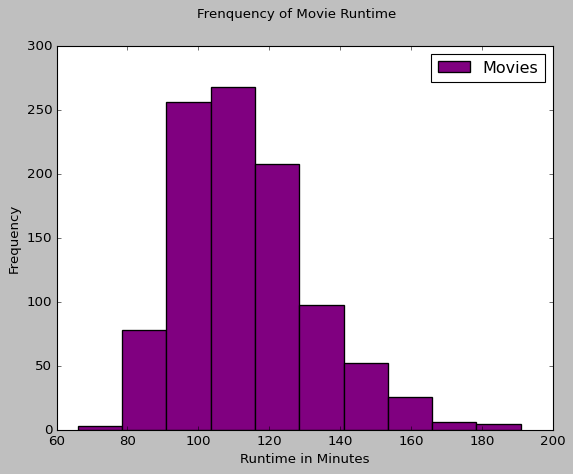

In [42]:
# Creating a histogram to illustrate distribution of the Runtime.
import matplotlib.pyplot as plt
plt.hist(clean_movies['Runtime_Minutes'], bins = 10, color = 'purple',
         label = 'Movies', edgecolor = 'black', linewidth = 1.2)
plt.suptitle('Frenquency of Movie Runtime')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Frequency')
plt.legend()
plt.show() 


## ***1.4***

In [11]:
# Ranking the Directors according to their average Rating.
print(clean_movies[['Director', 'Rating']].sort_values('Rating',
                                                       ascending = False))

              Director  Rating
54   Christopher Nolan     9.0
80   Christopher Nolan     8.8
117      Nitesh Tiwari     8.8
36   Christopher Nolan     8.6
96      Makoto Shinkai     8.6
..                 ...     ...
968     Micheal Bafaro     3.5
647  Jonathan Holbrook     3.2
871         James Wong     2.7
42       Shawn Burkett     2.7
829    Jason Friedberg     1.9

[1000 rows x 2 columns]


In [12]:
# Select the top ten Directors and comparing their movie ratings in a
# bar chart.
topD = clean_movies.groupby('Director')['Rating'].mean().sort_values(
    ascending = False)
topD 

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Makoto Shinkai       8.60
Olivier Nakache      8.60
Aamir Khan           8.50
                     ... 
Femi Oyeniran        3.50
Jonathan Holbrook    3.20
Shawn Burkett        2.70
James Wong           2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

Director
Nitesh Tiwari                       8.80
Christopher Nolan                   8.68
Makoto Shinkai                      8.60
Olivier Nakache                     8.60
Aamir Khan                          8.50
Florian Henckel von Donnersmarck    8.50
Naoko Yamada                        8.40
Damien Chazelle                     8.40
Lee Unkrich                         8.30
S.S. Rajamouli                      8.30
Name: Rating, dtype: float64


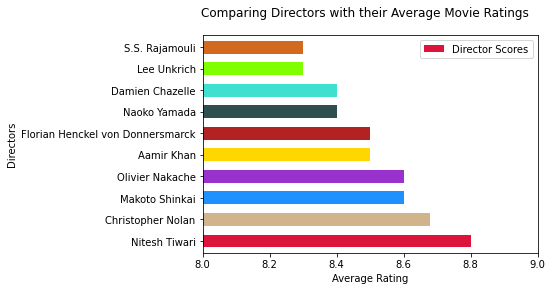

In [13]:
top10 = topD.iloc[0:10] # selecting the top 10 rated directors
print(top10)
top10.plot(kind = 'barh', width = 0.6, label = 'Director Scores',
           color = ['crimson', 'tan', 'dodgerblue', 'darkorchid', 'gold',
                    'firebrick', 'darkslategray', 'turquoise', 'chartreuse'
                    , 'chocolate'] )

plt.xlabel('Average Rating')
plt.ylabel('Directors')
plt.suptitle('Comparing Directors with their Average Movie Ratings')
plt.xlim(8, 9)
plt.legend(loc = 'upper right')
plt.show()

# ***1.5***

In [14]:
# generating three random integers as indices
import numpy as np
from random import randint

ran_num = np.random.randint(999, size = 3)

print(ran_num) # random numbers were 575, 47, 781

[616 994 714]


In [15]:
# Using the generated three indices to select the corresponding
# three Directors.


print(clean_movies.loc[575]) # Director: Louis Leterrier
print(clean_movies.loc[47]) # Director: Scott Hicks
print(clean_movies.loc[781]) # Director: Tarsem Singh

Rank                                                              576
Title                                             Clash of the Titans
Genre                                        Action,Adventure,Fantasy
Description         Perseus demigod, son of Zeus, battles the mini...
Director                                              Louis Leterrier
Actors              Sam Worthington, Liam Neeson, Ralph Fiennes,Ja...
Year                                                             2010
Runtime_Minutes                                                   106
Rating                                                            5.8
Votes                                                          238206
Revenue_Millions                                               163.19
Metascore                                                          39
Name: 575, dtype: object
Rank                                                               48
Title                                                          Fa

In [16]:
# Calculating the annual Metascore of the selected Directors

# Director: Louis Leterrier 
meta_ll = clean_movies[clean_movies['Director'] == 
                      'Louis Leterrier'].groupby(
                          'Director')['Metascore'].sum()
meta_ll 
# Total meta score of Louis Leterrier, 194

Director
Louis Leterrier    194.0
Name: Metascore, dtype: float64

In [20]:
# Director: Nacho Vigalondo
meta_sh = clean_movies[clean_movies['Director'] == 
                      'Scott Hicks'].groupby(
                          'Director')['Metascore'].sum()
meta_sh 
# Total meta score of Nacho Vigalondo, 70

Director
Scott Hicks    97.985043
Name: Metascore, dtype: float64

In [22]:
# Director: Josh Trank
meta_ts = clean_movies[clean_movies['Director'] == 
                      'Tarsem Singh'].groupby(
                          'Director')['Metascore'].sum()
meta_ts 
# Total meta score of Josh Trank, 27

Director
Tarsem Singh    144.0
Name: Metascore, dtype: float64

In [23]:
# Using three subplots to illustrate the directors Metascore by year.
# The range of the x-axis should be from 2006 to 2016.

# Director: Louis Leterrier
ll_df = clean_movies[clean_movies['Director'] == 'Louis Leterrier'].groupby(
    'Year')['Metascore'].sum().sort_values(ascending = False)
ll_df

Year
2008    61.0
2013    50.0
2016    44.0
2010    39.0
Name: Metascore, dtype: float64

In [24]:
# Director: Nacho Vigalondo
sh_df = clean_movies[clean_movies['Director'] == 'Scott Hicks'].groupby(
    'Year')['Metascore'].sum().sort_values(ascending = False)
sh_df


Year
2016    58.985043
2012    39.000000
Name: Metascore, dtype: float64

In [25]:
# Director: Josh Trank
ts_df = clean_movies[clean_movies['Director'] == 'Tarsem Singh'].groupby(
    'Year')['Metascore'].sum().sort_values(ascending = False)
ts_df

Year
2006    64.0
2011    46.0
2015    34.0
Name: Metascore, dtype: float64

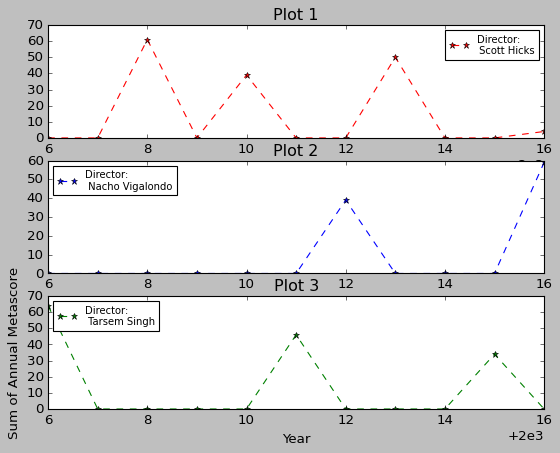

In [27]:
# producing three subplots,

# plotting style
plt.style.use('classic')

# prepare data
years = [2006, 2007, 2008, 2009, 
         2010, 2011, 2012, 2013,
         2014, 2015, 2016]
ll_subp = [0, 0, 61, 0, 39,
           0, 0, 50, 0, 0, 4]
sh_subp = [0, 0, 0, 0, 0, 0, 39,
           0, 0, 0, 59]
ts_subp = [64, 0, 0, 0, 0,
           46, 0, 0, 0, 34, 0]
# Set up a subplot grid that has height 3 and width 1,
#  and set the first such subplot as active.
fig, (ax1,ax2, ax3) = plt.subplots(3,1)

# Make the first plot
ax1.plot(years, ll_subp, 'r--*', label = 'Director:\n Scott Hicks')
ax1.set_title("Plot 1") # 
ax1.legend(loc = 'upper right', prop = {'size': 9})
plt.xlabel('Year')
plt.ylabel('Sum of Annual Metascore')

# make the second plot
ax2.plot(years, sh_subp,'b--*', label = 'Director:\n Nacho Vigalondo')
ax2.set_title("Plot 2") #
ax2.legend(loc = 'upper left', prop = {'size': 9})
plt.xlabel('Year') 
plt.ylabel('Sum of Annual Metascore')

# make the third plot
ax3.plot(years, ts_subp,'g--*', label = 'Director:\n Tarsem Singh')
ax3.set_title("Plot 3") #
ax3.legend(loc = 'upper left', prop = {'size': 9})
plt.xlabel('Year')
plt.ylabel('Sum of Annual Metascore')

plt.show()

# ***1.6***

In [28]:
# selecting and sampling movies' Revenue and Metascore 
#viewing the data
meta_rev = round(clean_movies[['Metascore', 'Revenue_Millions']])
print(meta_rev.describe())

         Metascore  Revenue_Millions
count  1000.000000       1000.000000
mean     58.986000         82.948000
std      16.634859         96.413271
min      11.000000          0.000000
25%      47.750000         17.000000
50%      59.000000         60.000000
75%      71.000000         99.250000
max     100.000000        937.000000


In [29]:
# placing constraints on the data
meta_rev_cn = meta_rev[(meta_rev['Revenue_Millions'] < 700) & 

# cleaned movies invovles NaNs appended as the mean,
# this obscures the graph line. so mean number not included. 
                       (meta_rev['Revenue_Millions'] != 83) &
                       (meta_rev['Revenue_Millions'] > 45)                       
]
meta_rev_cn.describe()

,Metascore,Revenue_Millions
count,448.000000,448.000000
mean,59.785714,142.426339
std,15.673645,100.701917
min,19.000000,46.000000
25%,49.000000,67.000000
50%,59.000000,108.500000
75%,71.000000,180.000000
max,96.000000,652.000000


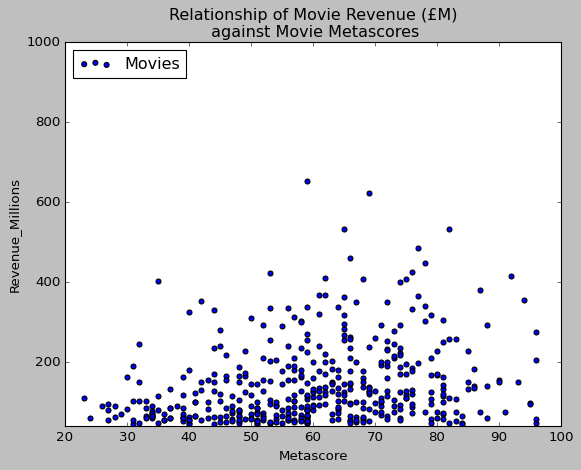

In [30]:
# plotting revenue against metascore 

meta_rev_cn.plot(kind = 'scatter',
                 x = 'Metascore',
                 y = 'Revenue_Millions',
                 label = 'Movies',
                 logy = False,
                 xlim = (20, 100),
                 ylim = (40, 1000))
plt.legend(loc = 'upper left')
plt.title('Relationship of Movie Revenue (£M)\n against Movie Metascores')
plt.show()

# ***1.7***

In [31]:
# generating 30 random integers 0 to 1000
x = np.random.randint(0,1000,30)
print(x)


[953 313  62 363 829 846 784 309 780 586 598 557 210 311  83  85 410 246
  39 630 175 737 450 149 768 839 809 154 864 219]


In [32]:
# using the generated random numbers to extract rows
#  from the dataframe clean movies

cmx = clean_movies.loc[x]
print(cmx)

     Rank  ...  Metascore
953   954  ...  61.000000
313   314  ...  59.000000
62     63  ...  48.000000
363   364  ...  73.000000
829   830  ...  15.000000
846   847  ...  55.000000
784   785  ...  31.000000
309   310  ...  51.000000
780   781  ...  56.000000
586   587  ...  59.000000
598   599  ...  67.000000
557   558  ...  40.000000
210   211  ...  43.000000
311   312  ...  88.000000
83     84  ...  79.000000
85     86  ...  59.000000
410   411  ...  50.000000
246   247  ...  84.000000
39     40  ...  58.985043
630   631  ...  55.000000
175   176  ...  60.000000
737   738  ...  57.000000
450   451  ...  57.000000
149   150  ...  42.000000
768   769  ...  56.000000
839   840  ...  60.000000
809   810  ...  30.000000
154   155  ...  58.985043
864   865  ...  41.000000
219   220  ...  66.000000

[30 rows x 12 columns]


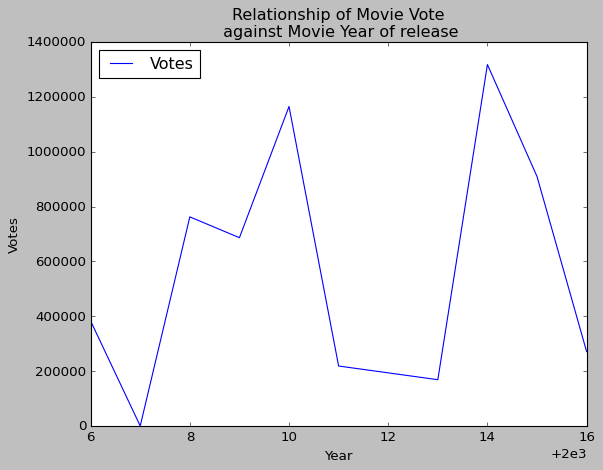

In [109]:
# Drawing a chart to present the relationship between 
# movie Year and movie Votes.

cmx1 = cmx.groupby('Year')['Votes'].sum()
cmx1.plot(x = 'Year',
          ylabel = 'Votes',
          y = 'Votes',
          legend = 'Votes',
          title = 'Relationship of Movie Vote\n against Movie Year of release',
          xlim = (2006, 2016))